In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = r'/content/drive/My Drive/Colab Notebooks/CarRentalDataV1.csv'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(path)

In [5]:
df.columns

Index(['fuelType', 'rating', 'renterTripsTaken', 'reviewCount',
       'location.city', 'location.country', 'location.latitude',
       'location.longitude', 'location.state', 'owner.id', 'rate.daily',
       'vehicle.make', 'vehicle.model', 'vehicle.type', 'vehicle.year',
       'airportcity'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   float64
 3   reviewCount         5851 non-null   float64
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   float64
 10  rate.daily          5851 non-null   float64
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   float64
 15  airportcity         5851 non-null   object 
dtypes: flo

In [8]:
df.shape

(5851, 16)

In [19]:
df.isnull().sum()

,0
fuelType,75
rating,501
renterTripsTaken,0
reviewCount,0
location.city,0
location.country,0
location.latitude,0
location.longitude,0
location.state,0
owner.id,0


In [20]:
df.fuelType.value_counts()

,count
fuelType,
GASOLINE,4810
ELECTRIC,622
HYBRID,274
DIESEL,70


In [29]:
df['fuelType'] = df['fuelType'].fillna('GASOLINE')

In [31]:
df.isnull().sum()

,0
fuelType,0
rating,501
renterTripsTaken,0
reviewCount,0
location.city,0
location.country,0
location.latitude,0
location.longitude,0
location.state,0
owner.id,0


In [32]:
df1 = df.dropna()

In [35]:
df1.isnull().sum()

,0
fuelType,0
rating,0
renterTripsTaken,0
reviewCount,0
location.city,0
location.country,0
location.latitude,0
location.longitude,0
location.state,0
owner.id,0


# Univariant Analysis

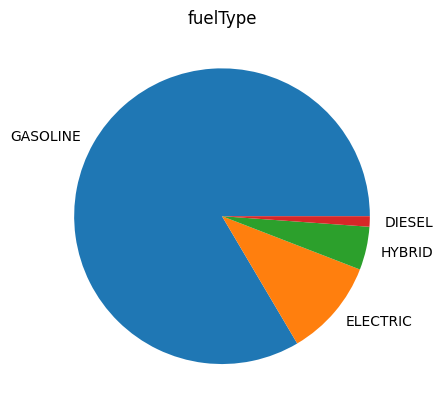

In [47]:
labels=df1['fuelType'].value_counts().index
values=df1['fuelType'].value_counts().values


plt.pie(values ,labels = labels)
plt.title('fuelType')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='rating'>

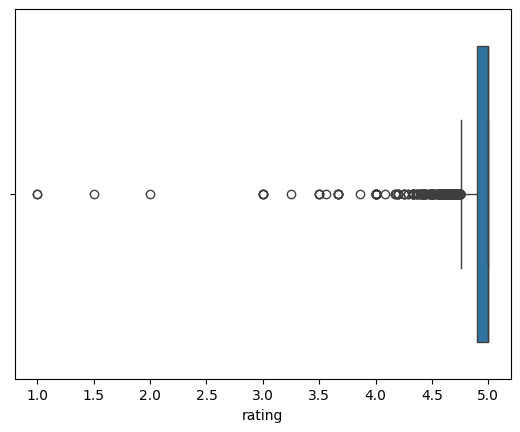

In [43]:
sns.boxplot(x='rating', data=df1)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='renterTripsTaken'>

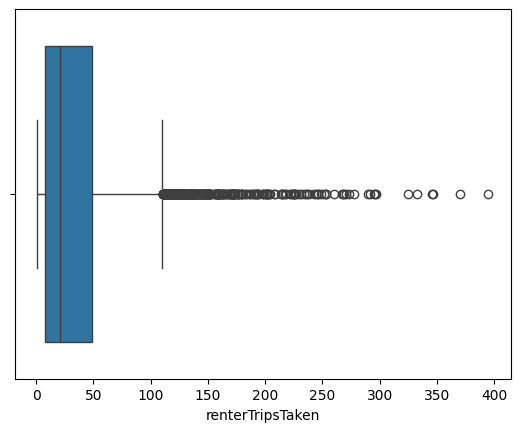

In [42]:
sns.boxplot(x='renterTripsTaken', data=df1)

In [57]:
# TOp states where the rental cars are taken
df['location.state'].value_counts().sort_values()[:-10:-1]

,count
location.state,
CA,966
FL,836
TX,499
CO,238
NV,233
GA,230
AZ,223
NC,219
NJ,211


Text(0, 0.5, 'Count')

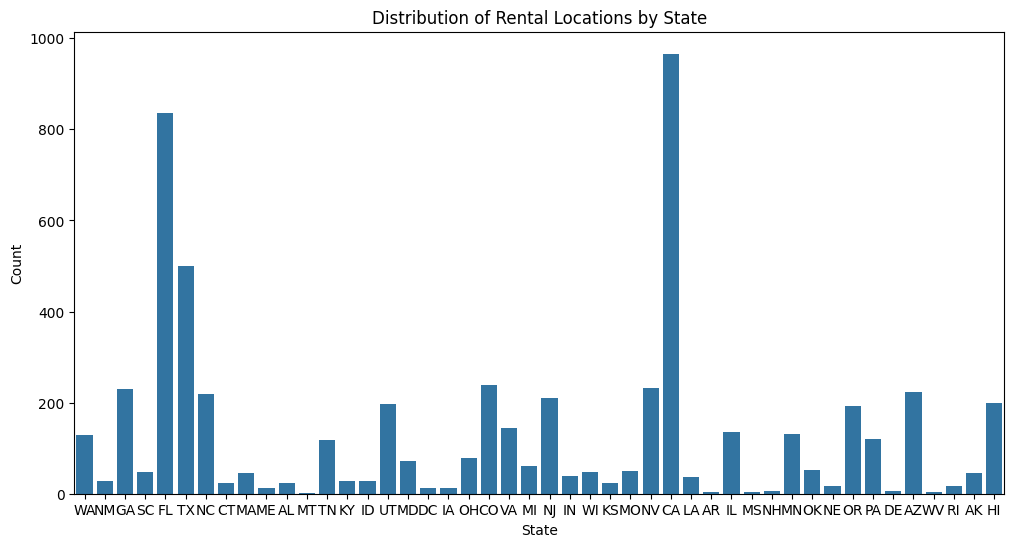

In [53]:
plt.figure(figsize=(12, 6))

sns.countplot(x='location.state', data=df)
plt.title('Distribution of Rental Locations by State')
plt.xlabel('State')
plt.ylabel('Count')

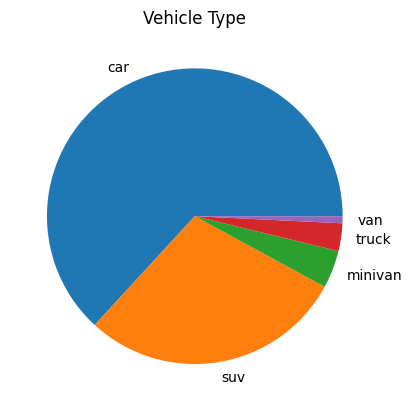

In [46]:
labels=df1['vehicle.type'].value_counts().index
values=df1['vehicle.type'].value_counts().values

plt.pie(values ,labels = labels)
plt.title('Vehicle Type')
plt.show()

Text(0, 0.5, 'Count')

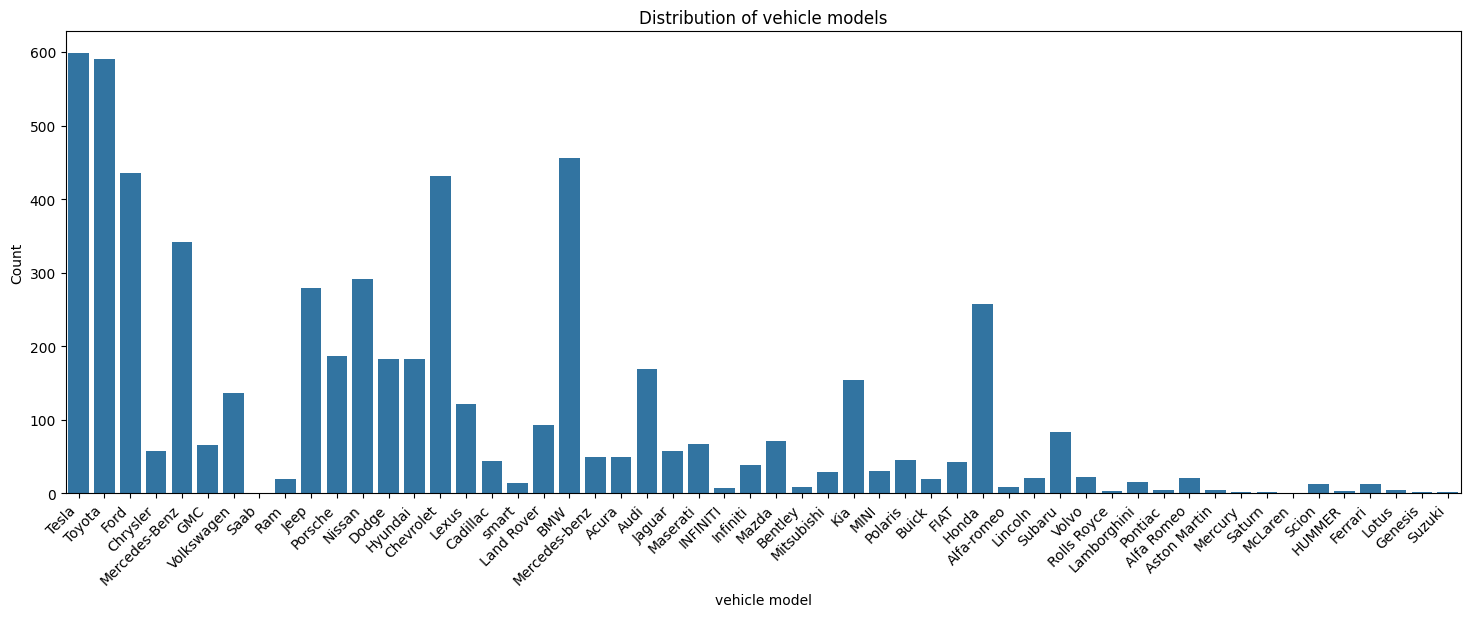

In [60]:
plt.figure(figsize=(18, 6))

sns.countplot(x='vehicle.make', data=df)
plt.title('Distribution of vehicle models')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.xlabel('vehicle model')
plt.ylabel('Count')

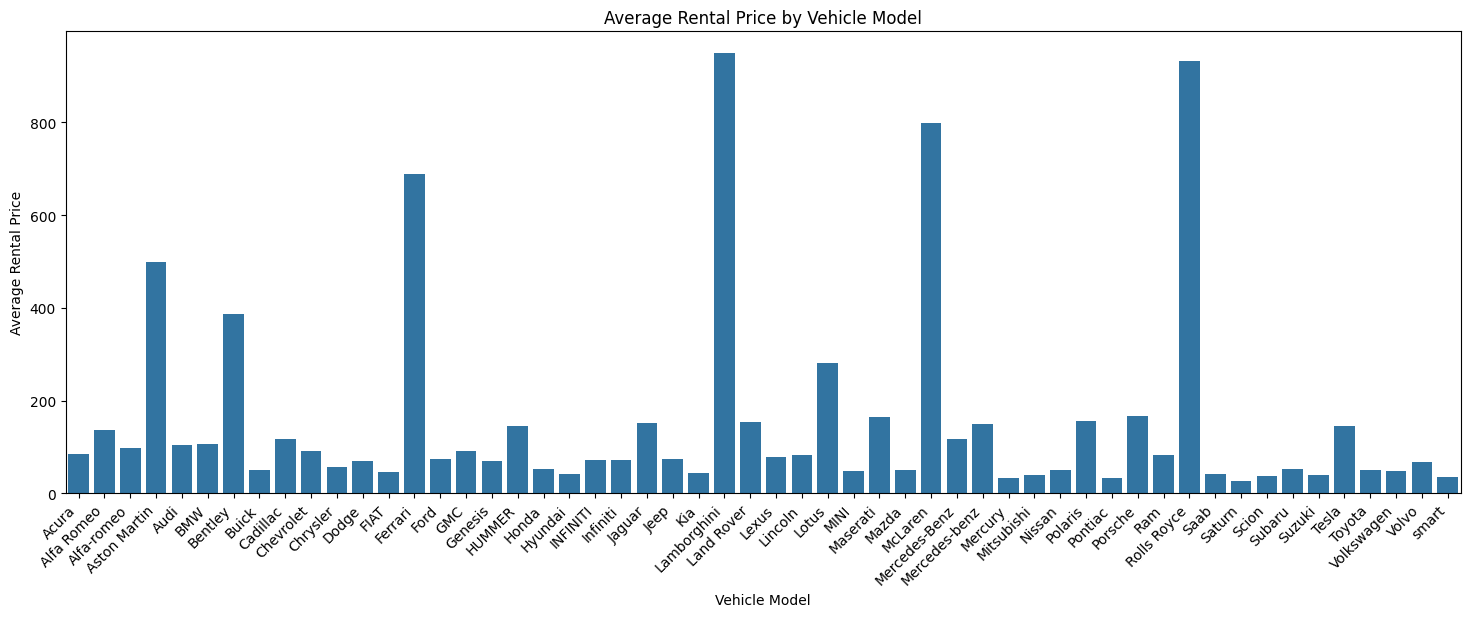

In [65]:
average_prices = df.groupby('vehicle.make')['rate.daily'].mean()

plt.figure(figsize=(18, 6))

sns.barplot(x=average_prices.index, y=average_prices.values)
plt.title('Average Rental Price by Vehicle Model')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.xlabel('Vehicle Model')
plt.ylabel('Average Rental Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


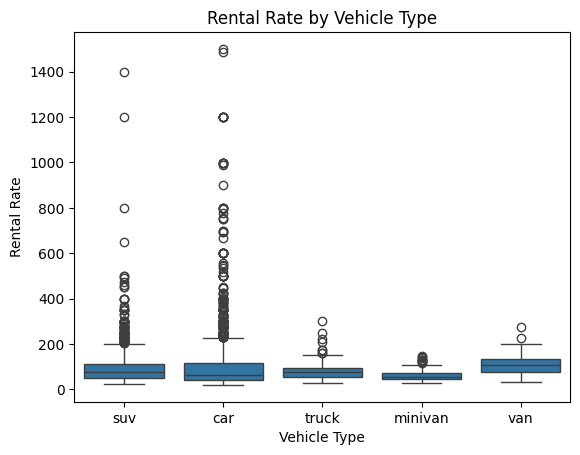

In [62]:
sns.boxplot(x='vehicle.type', y='rate.daily', data=df)
plt.title('Rental Rate by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Rental Rate')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


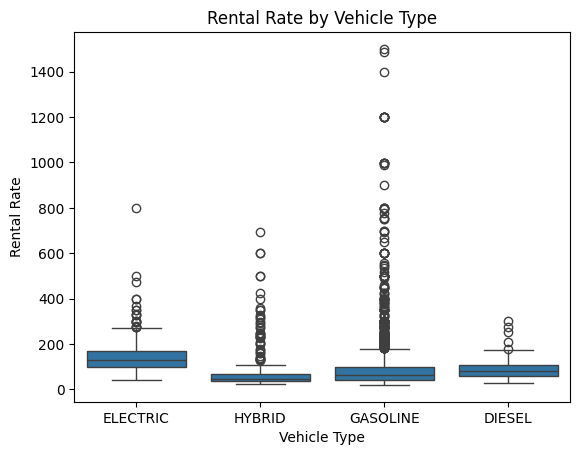

In [63]:
sns.boxplot(x='fuelType', y='rate.daily', data=df)
plt.title('Rental Rate by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Rental Rate')
plt.show()

In [72]:
df1['vehicle.year'].value_counts().head(14)

,count
vehicle.year,
2018.0,761
2019.0,700
2017.0,639
2016.0,619
2015.0,578
2014.0,418
2013.0,344
2020.0,268
2012.0,263


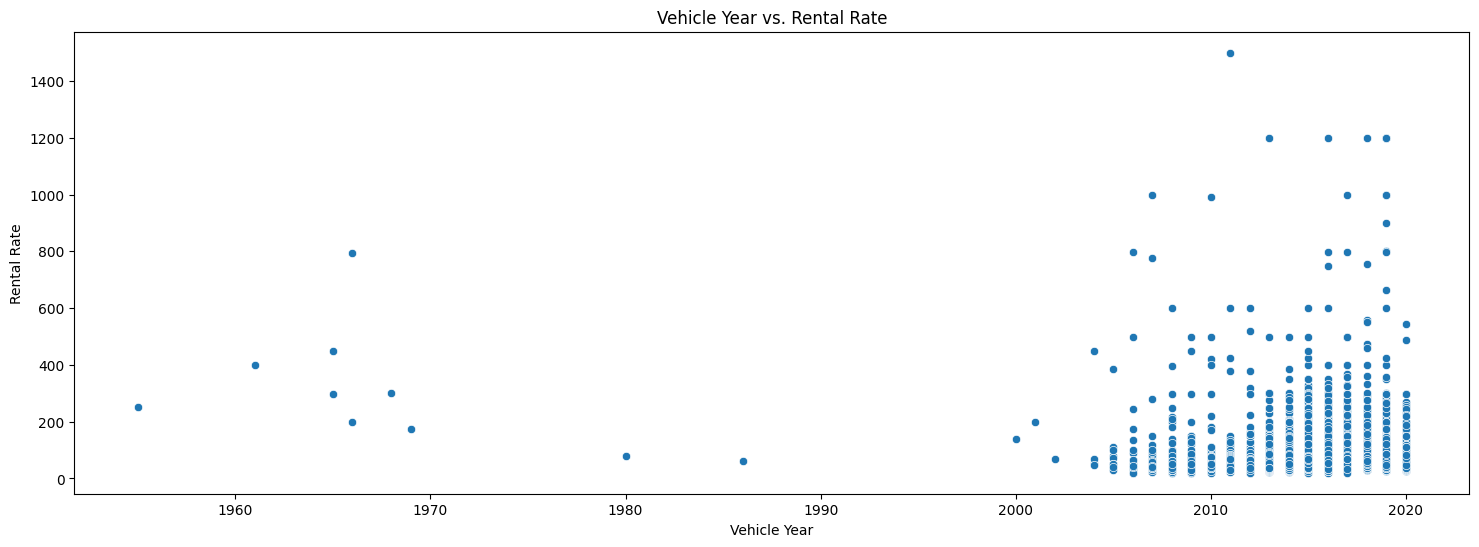

In [70]:
plt.figure(figsize=(18, 6))

sns.scatterplot(x='vehicle.year', y='rate.daily', data=df1)
plt.title('Vehicle Year vs. Rental Rate')
plt.xlabel('Vehicle Year')
plt.ylabel('Rental Rate')
plt.show()

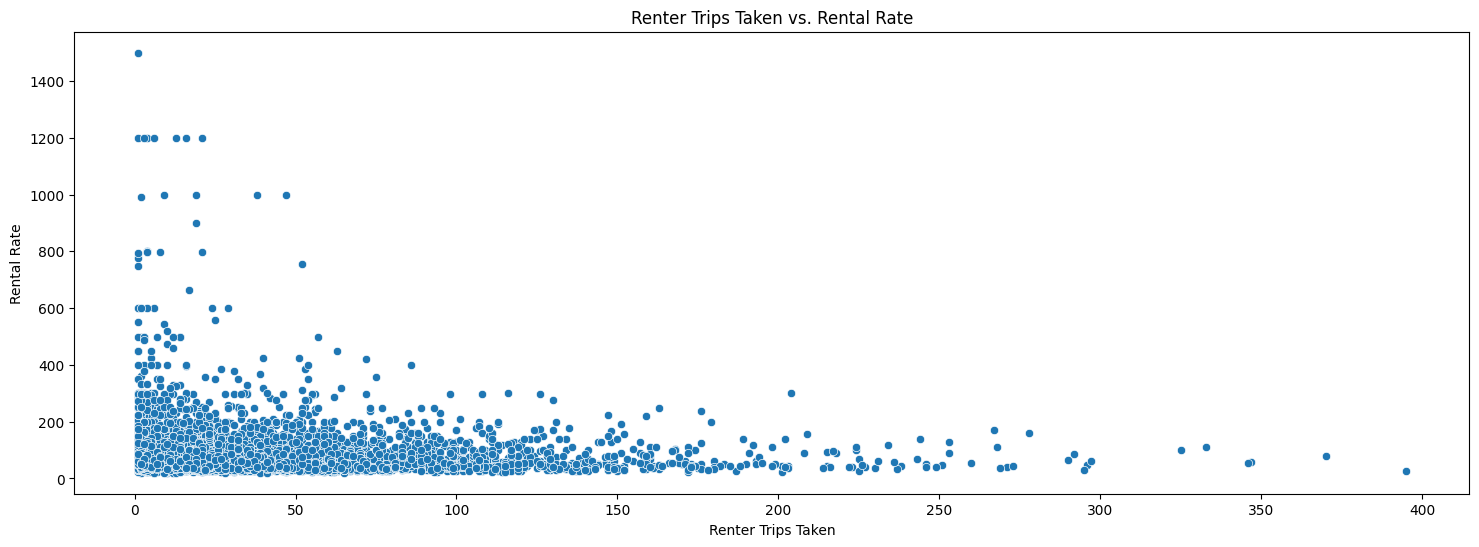

In [69]:
plt.figure(figsize=(18, 6))

sns.scatterplot(x='renterTripsTaken', y='rate.daily', data=df1)
plt.title('Renter Trips Taken vs. Rental Rate')
plt.xlabel('Renter Trips Taken')
plt.ylabel('Rental Rate')
plt.show()